<a href="https://colab.research.google.com/github/tessasaporito/ds2002-fce6sy/blob/main/ds2002_hw_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1

In [69]:
import sqlite3

connection = sqlite3.connect('student_grades.db')

cursor = connection.cursor()

Part 2

In [70]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER NOT NULL,
    subject TEXT NOT NULL,
    grade INTEGER NOT NULL,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

Part 3

In [71]:
students_data = (
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol','White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
)

cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)

connection.commit()

In [72]:
grades_data = (
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 78),
    (3, 'English', 82),
    (3, 'History', 99),
    (4, 'Math', 100),
    (4, 'English', 94),
    (4, 'History', 95),
    (5, 'Math', 70),
    (5, 'English', 73),
    (5, 'History', 69),
    )

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?,?,?)
''', grades_data)

connection.commit()

Part 4

In [73]:
cursor.execute('''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
''')
rows = cursor.fetchall()

for row in rows:
    print(row)

('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 78)
('Carol', 'White', 'English', 82)
('Carol', 'White', 'History', 99)
('David', 'Brown', 'Math', 100)
('David', 'Brown', 'English', 94)
('David', 'Brown', 'History', 95)
('Eve', 'Davis', 'Math', 70)
('Eve', 'Davis', 'English', 73)
('Eve', 'Davis', 'History', 69)
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 78)
('Carol', 'White', 'English', 82)
('Carol', 'White', 'History', 99)
('David', 'Brown', 'Math', 100)
('David', 'Brown', 'English', 94)
('David', 'Brown', 'History', 95)
('Eve', 'Davis', 'Math', 70)
('Eve', 'Davis', 'English', 73)
('Eve', 'Davis', 'History', 69)
('Alice', 'Johnson',

In [74]:
cursor.execute('''
    SELECT students.first_name, students.last_name, AVG(grades.grade)
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id
''')
rows = cursor.fetchall()

for row in rows:
    print(row)

('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 86.33333333333333)
('David', 'Brown', 96.33333333333333)
('Eve', 'Davis', 70.66666666666667)


In [75]:
cursor.execute('''
    SELECT students.first_name, students.last_name, AVG(grades.grade)
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id
    ORDER BY AVG(grades.grade) DESC
    LIMIT 1
''')
row = cursor.fetchone()

print(row)

('David', 'Brown', 96.33333333333333)


In [76]:
cursor.execute('''
    SELECT AVG(grades.grade)
    FROM grades
    WHERE grades.subject = 'Math'
''')
row = cursor.fetchone()

print(row)

(85.0,)


In [77]:
cursor.execute('''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    WHERE grades.grade > 90
''')
rows = cursor.fetchall()

for row in rows:
    print(row)

('Alice', 'Johnson', 'Math', 95)
('Carol', 'White', 'History', 99)
('David', 'Brown', 'Math', 100)
('David', 'Brown', 'English', 94)
('David', 'Brown', 'History', 95)
('Alice', 'Johnson', 'Math', 95)
('Carol', 'White', 'History', 99)
('David', 'Brown', 'Math', 100)
('David', 'Brown', 'English', 94)
('David', 'Brown', 'History', 95)
('Alice', 'Johnson', 'Math', 95)
('Carol', 'White', 'History', 99)
('David', 'Brown', 'Math', 100)
('David', 'Brown', 'English', 94)
('David', 'Brown', 'History', 95)
('Alice', 'Johnson', 'Math', 95)
('Carol', 'White', 'History', 99)
('David', 'Brown', 'Math', 100)
('David', 'Brown', 'English', 94)
('David', 'Brown', 'History', 95)


Part 5

In [78]:
cursor.execute('''
SELECT students.student_id, students.first_name, students.last_name, grades.grade_id, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

joined_data = cursor.fetchall()

print("Joined table details:")
for row in joined_data:
    print(row)

Joined table details:
(1, 'Alice', 'Johnson', 1, 'Math', 95)
(1, 'Alice', 'Johnson', 2, 'English', 88)
(1, 'Alice', 'Johnson', 3, 'History', 90)
(2, 'Bob', 'Smith', 4, 'Math', 82)
(2, 'Bob', 'Smith', 5, 'English', 76)
(2, 'Bob', 'Smith', 6, 'History', 85)
(3, 'Carol', 'White', 7, 'Math', 78)
(3, 'Carol', 'White', 8, 'English', 82)
(3, 'Carol', 'White', 9, 'History', 99)
(4, 'David', 'Brown', 10, 'Math', 100)
(4, 'David', 'Brown', 11, 'English', 94)
(4, 'David', 'Brown', 12, 'History', 95)
(5, 'Eve', 'Davis', 13, 'Math', 70)
(5, 'Eve', 'Davis', 14, 'English', 73)
(5, 'Eve', 'Davis', 15, 'History', 69)
(1, 'Alice', 'Johnson', 16, 'Math', 95)
(1, 'Alice', 'Johnson', 17, 'English', 88)
(1, 'Alice', 'Johnson', 18, 'History', 90)
(2, 'Bob', 'Smith', 19, 'Math', 82)
(2, 'Bob', 'Smith', 20, 'English', 76)
(2, 'Bob', 'Smith', 21, 'History', 85)
(3, 'Carol', 'White', 22, 'Math', 78)
(3, 'Carol', 'White', 23, 'English', 82)
(3, 'Carol', 'White', 24, 'History', 99)
(4, 'David', 'Brown', 25, 'Math'

In [79]:
import pandas as pd

both = '''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
'''

df = pd.read_sql_query(both, connection)

df.head()

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,Alice,Johnson,English,88
2,Alice,Johnson,History,90
3,Bob,Smith,Math,82
4,Bob,Smith,English,76


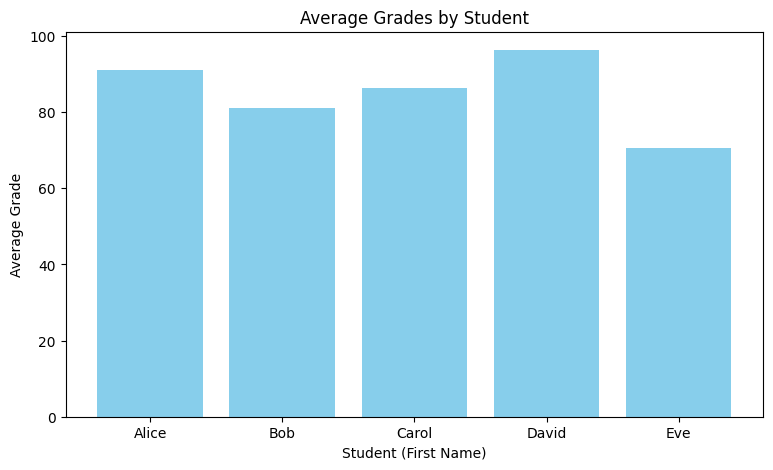

In [86]:
import matplotlib.pyplot as plt

cursor.execute('''
    SELECT students.first_name, students.last_name, AVG(grades.grade)
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id
''')
rows = cursor.fetchall()

student_grade_df = pd.DataFrame(rows, columns=['first_name', 'last_name', 'avg_grade'])


plt.figure(figsize=(9, 5))
plt.bar(student_grade_df['first_name'], student_grade_df['avg_grade'], color='skyblue')
plt.xlabel('Student (First Name)')
plt.ylabel('Average Grade')
plt.title('Average Grades by Student')
plt.show()

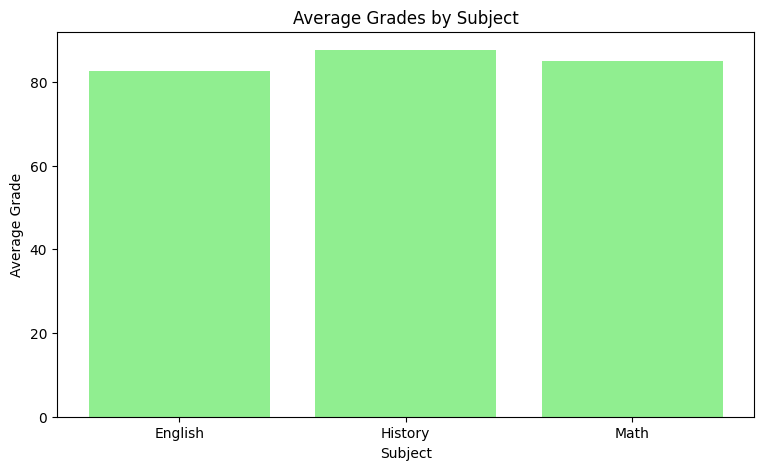

In [87]:
cursor.execute('''
    SELECT grades.subject, AVG(grades.grade)
    FROM grades
    GROUP BY grades.subject
''')
rows = cursor.fetchall()

subject_grade_df = pd.DataFrame(rows, columns=['subject', 'avg_grade'])


plt.figure(figsize=(9, 5))
plt.bar(subject_grade_df['subject'], subject_grade_df['avg_grade'], color='lightgreen')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grades by Subject')
plt.show()